

1.   MNIST dataset used
2.   DataLoader and Transformation
3.   MLP, activation function
4.   Loss and Optimizer
5.   Training Loop
6.   Model Evaluation
7.   GPU support if available

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [4]:
#device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 784 #as images are of size 28*28
hidden_size = 100
num_classes = 10 #digits from 0 - 9
num_epochs = 2
batch_size = 100
learning_rate = 0.001

#MNIST

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform= transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform= transforms.ToTensor())


train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size , shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,  batch_size= batch_size, shuffle=False)


examples = iter(train_loader)
samples, labels = examples.next()

print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


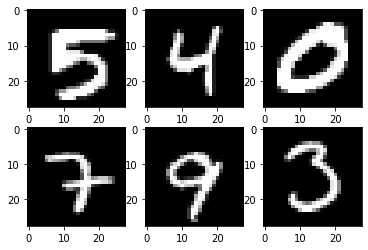

In [5]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0], cmap='gray')

plt.show()

# Now we want to classify these images

In [12]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet,self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  
  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out
    # we don't want activation function we will use cross entropy loss which indirectly applies softmax
  

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)

#training loop

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i , (images, labels) in enumerate(train_loader):
    #100,1,28,28 image
    #flatten 100,784
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # forward pass

    output = model(images)
    loss = criterion(output, labels)

    #backward pass
    optimizer.zero_grad()
    loss.backward()

    #updates the values
    optimizer.step()


    if(i+1)%100 ==0:
      print(f'epoch{epoch+1}/{num_epochs}, step = {i+1}/{n_total_steps}, loss={loss.item():.4f}')


#Test we don't want to compute gradients here as it's already calculated

with torch.no_grad():
  n_correct = 0
  n_samples = 0

  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model (images)

    _,predictions = torch.max(outputs,1)
    n_samples += labels.shape[0]
    n_correct += (predictions==labels).sum().item()

  acc = 100.0 * n_correct/n_samples

  print(f'accuracy = {acc:.4f}')

         

epoch1/2, step = 100/600, loss=0.3862
epoch1/2, step = 200/600, loss=0.3103
epoch1/2, step = 300/600, loss=0.4155
epoch1/2, step = 400/600, loss=0.3423
epoch1/2, step = 500/600, loss=0.3723
epoch1/2, step = 600/600, loss=0.4166
epoch2/2, step = 100/600, loss=0.0978
epoch2/2, step = 200/600, loss=0.1620
epoch2/2, step = 300/600, loss=0.2269
epoch2/2, step = 400/600, loss=0.2363
epoch2/2, step = 500/600, loss=0.1992
epoch2/2, step = 600/600, loss=0.0732
accuracy = 95.1200
